# Employee Attrition Prediction with Machine Learning
By Bobby Gajbhiye | linkedin.com/in/bobby-gajbhiye-17692a101 | github.com/bobbygajbhiye

### Problem Statement

Employee attrition is minimizing in any organization where employees resign. Employees are valuable assets of any organization. It is necessary to know whether the employees are dissatisfied or whether there are other reasons for leaving their respective jobs.

### Motivation

Employees are the backbone of an organization. The success or failure of the organization depends on the employees who work for an organization. Organizations must deal with the problems when trained and experienced employees leave the organization for better opportunities.

An agency of an intergovernmental organization with a presence in more than 100 countries was facing a similar situation, when they decided to integrate performance management of all employees on a single system. We helped them to predict employee attrition based on collected data.

### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

## Importing Data

In [2]:
data=pd.read_excel(r'C:\Users\DELL\Desktop\dev\models\employee-attrition-prediction\employee_attrition.xlsx')
pd.pandas.set_option('display.max_columns',None)
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


### Checking null values
There are no null values present in dataset 

In [3]:
data.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

### Checking data imbalance
Since a few employees think to leave the organization, we would have less count of employees with attrition.

Distribution of class values in Attrition feature is different, it is imbalance dataset.

In [4]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

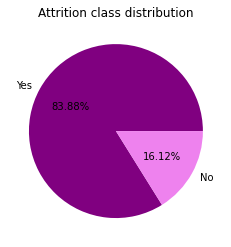

In [5]:
labels= ['Yes', 'No']
colors=['purple', 'violet']
sizes= [1233, 237]

plt.pie(data['Attrition'].value_counts(),labels=labels, colors=colors, autopct='%1.2f%%')

plt.title('Attrition class distribution')
plt.show()

### Dropping features with constant value

EmployeeCount, Over18 & StandardHours features have single value which is of no use to predict the employee attrition.

In [6]:
print(data['EmployeeCount'].value_counts())
print(data['Over18'].value_counts())
print(data['StandardHours'].value_counts())

1    1470
Name: EmployeeCount, dtype: int64
Y    1470
Name: Over18, dtype: int64
80    1470
Name: StandardHours, dtype: int64


In [7]:
data.drop(['EmployeeNumber','EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)

# Finding Correlation

The first step in a data exploration is to find the correlation matrix. By plotting a correlation matrix, we get a really good look at how the features relate to each other. 

In this correlation plot, I will be using the Pearson correlation function and Heatmap as follows:

<AxesSubplot:>

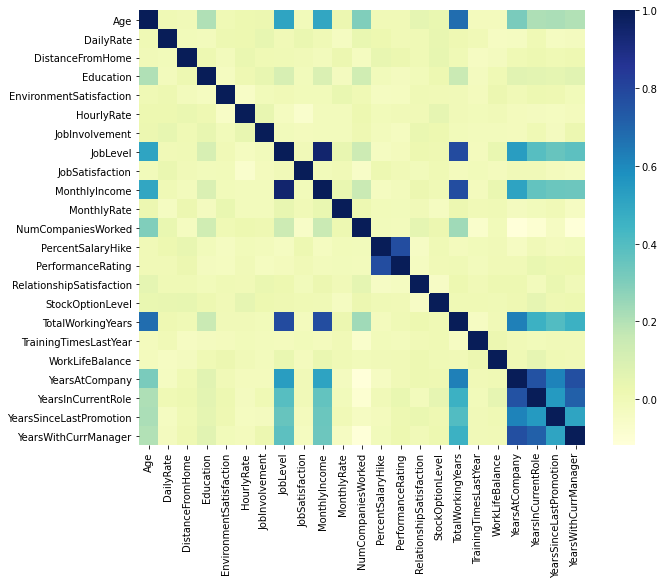

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap="YlGnBu")

### Observations From Above Plot:

From the correlation plot, we can see that a lot of our columns appear to be poorly correlated to each other. Generally, when building a predictive model, it would be better to train a model with features that are not too correlated with each other so that we don’t need to deal with redundant features.

# Data Analysis on Continuous Variable

In [9]:
continuous_features=[feature for feature in data.columns if data[feature].dtype!='O' and len(data[feature].unique())>20]
print('Number of numerical variables: ', len(continuous_features))

Number of numerical variables:  8


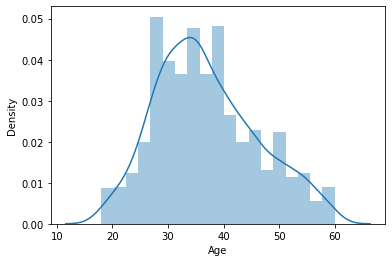

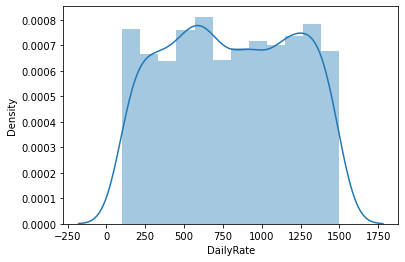

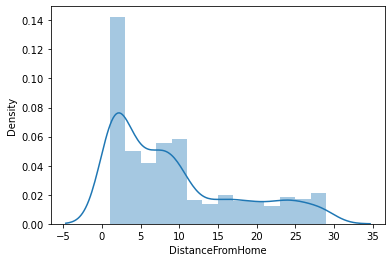

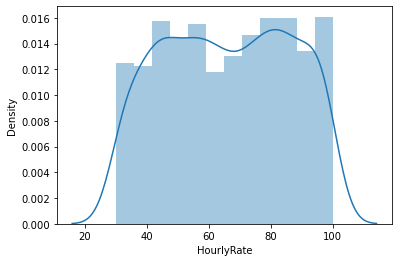

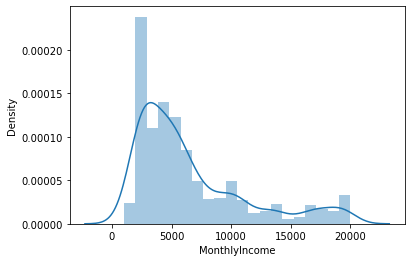

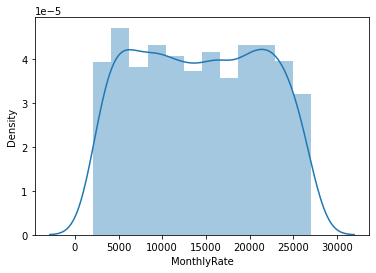

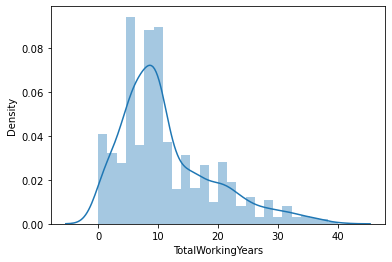

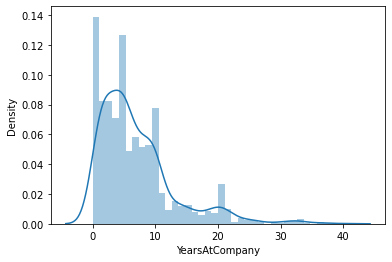

In [10]:
for feature in continuous_features:
    sns.distplot(data[feature])
    plt.show()

DistanceFromHome and MonthlyIncome features are having skewed distribution.
I have applied log transformation to check if distribution changes to normal.

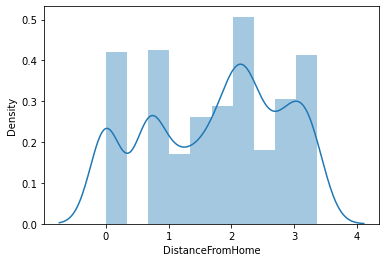

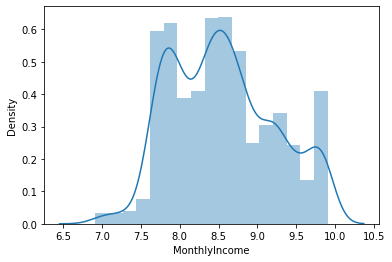

In [11]:
for feature in ['DistanceFromHome','MonthlyIncome']:
    df=data.copy()
    df[feature]=np.log(df[feature])
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.show()

# Descrete variable

In [12]:
descrete_features=[feature for feature in data.columns if data[feature].dtype!='O' and feature not in continuous_features]
print('Number of numerical variables: ', len(descrete_features))

Number of numerical variables:  15


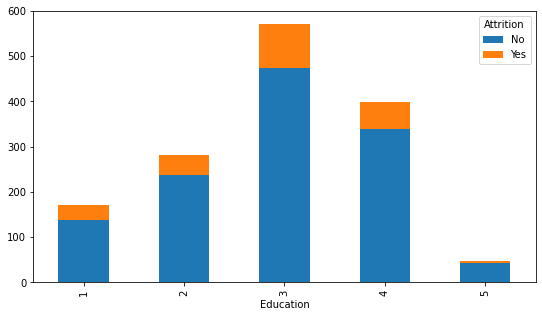

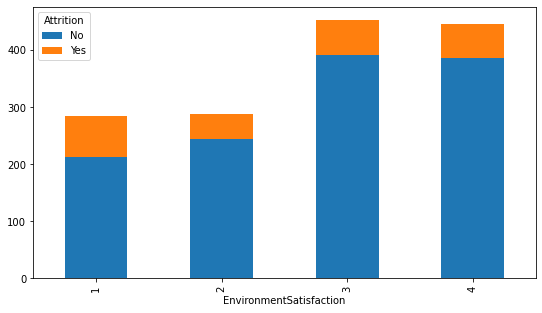

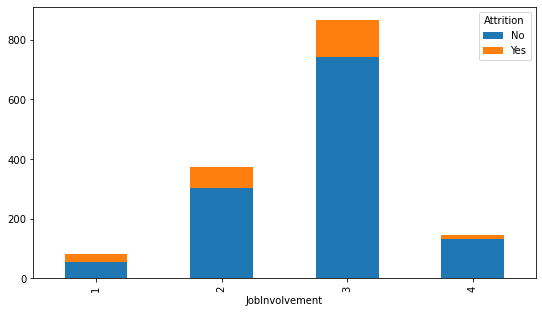

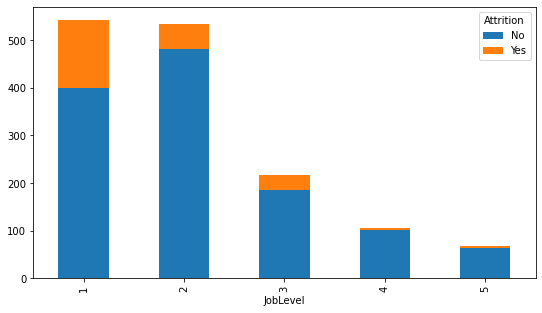

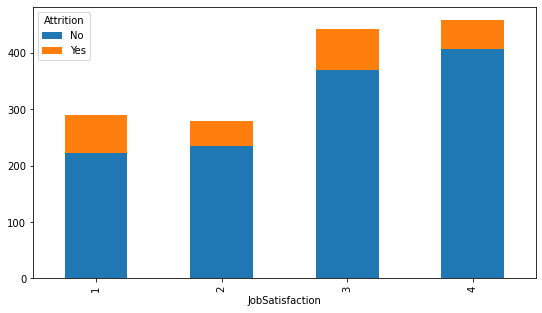

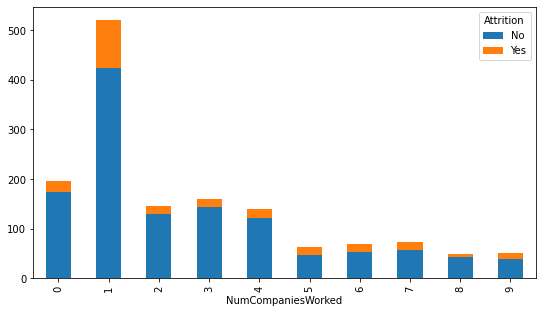

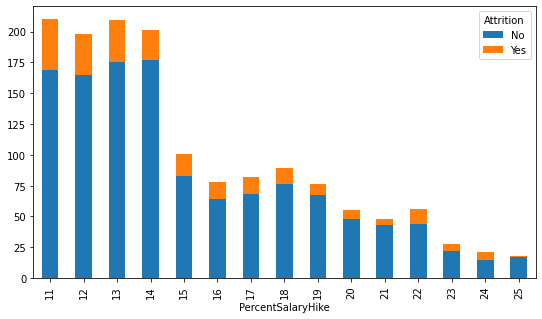

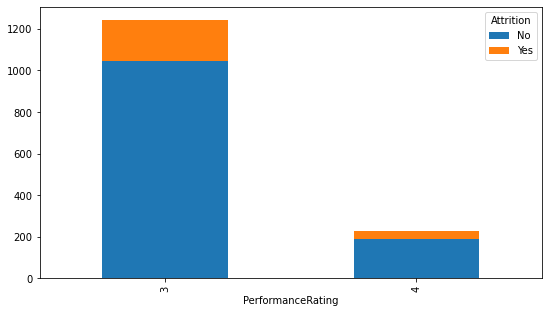

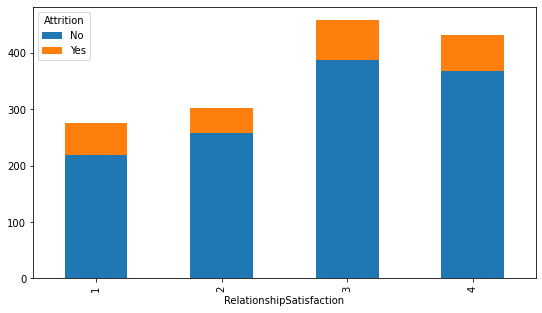

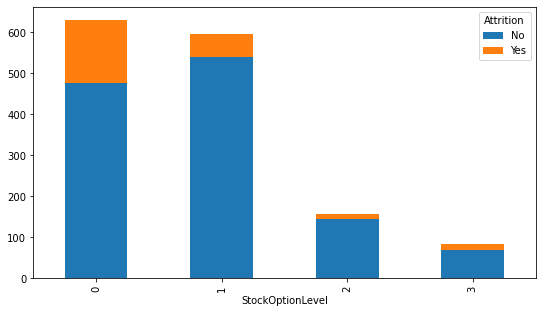

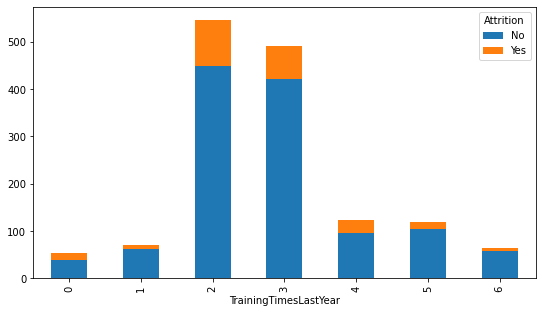

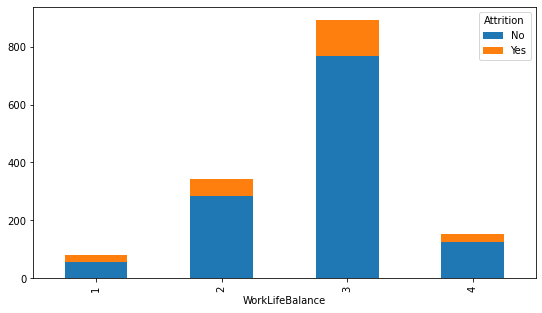

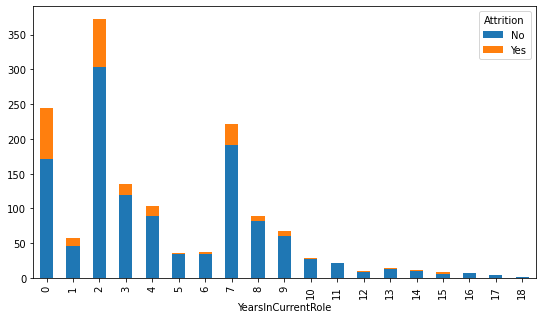

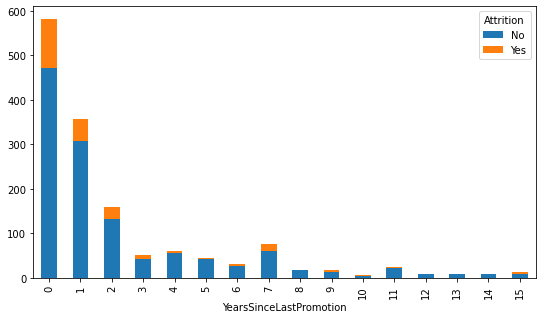

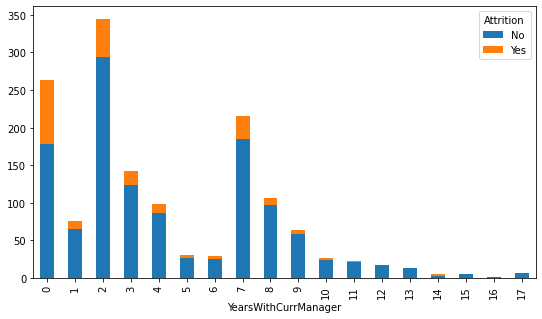

In [13]:
for feature in descrete_features:
    data.groupby([feature, 'Attrition']).size().unstack().plot(kind='bar', stacked=True, figsize=(9,5))
    plt.show()

# Categorical variable

In [14]:
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']
print('Number of numerical variables: ', len(categorical_features))

Number of numerical variables:  8


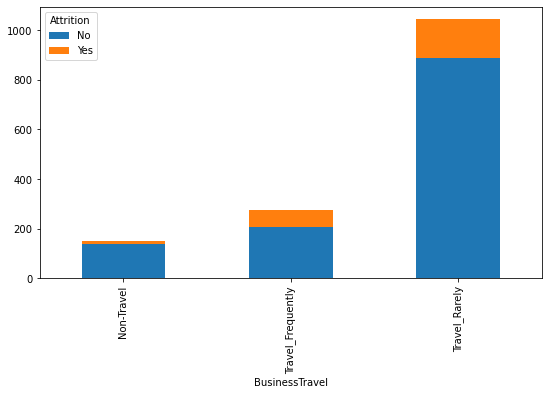

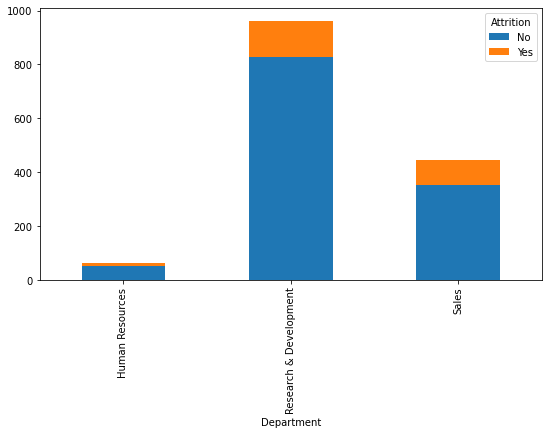

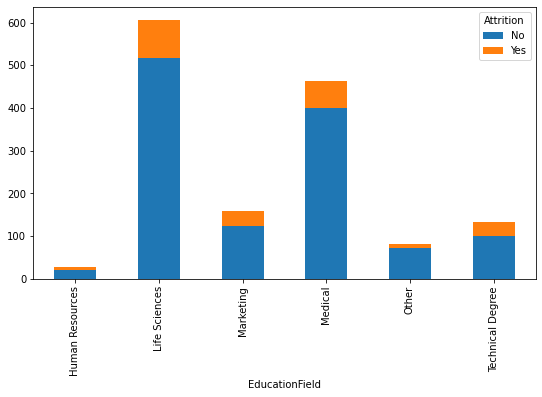

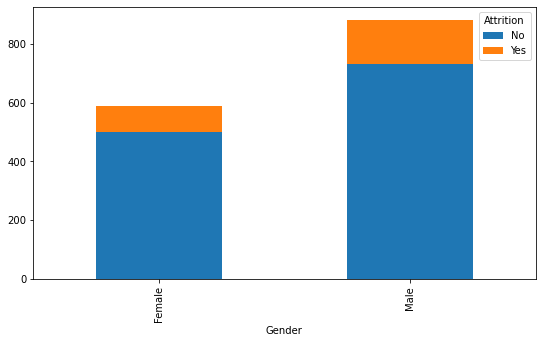

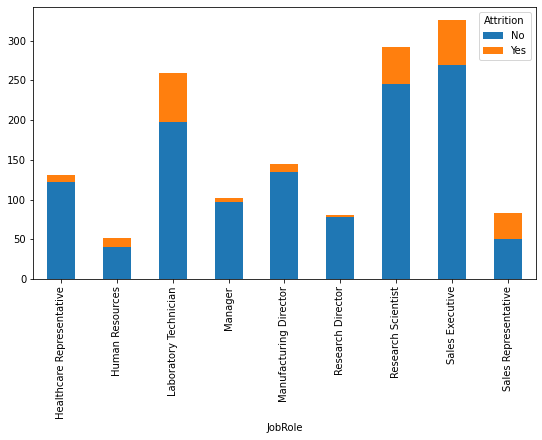

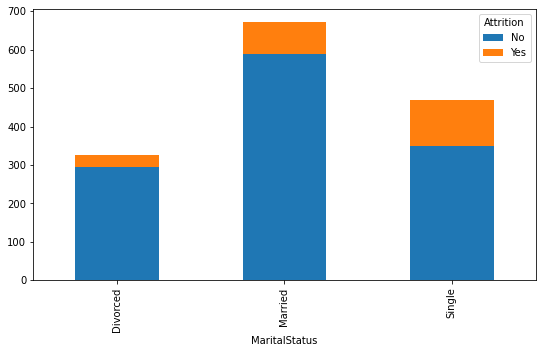

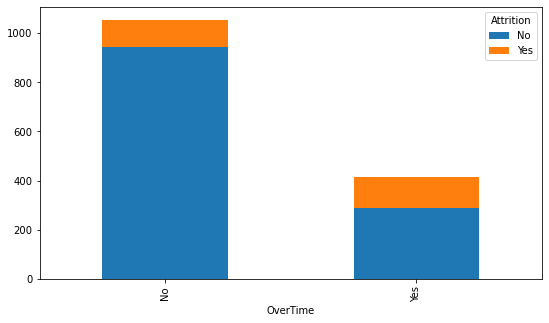

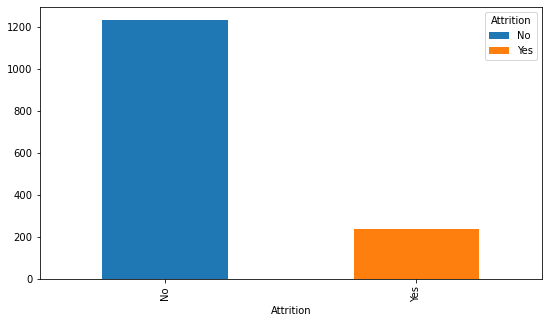

In [15]:
for feature in categorical_features:
    data.groupby([feature, 'Attrition']).size().unstack().plot(kind='bar', stacked=True, figsize=(9,5))
    plt.show()

# Preprocessing

In [16]:
data=pd.get_dummies(data, columns=categorical_features, drop_first=True)

In [17]:
data.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition_Yes
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0


# Modelling

### Train Test Split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(data.iloc[:,:-1],data['Attrition_Yes'],stratify=data['Attrition_Yes'])

### Modeling with Oversampling using SMOTE

0    924
1    924
Name: Attrition_Yes, dtype: int64


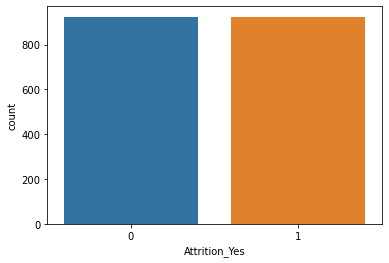

In [19]:
oversample = SMOTE()
smote_train, smote_target = oversample.fit_resample(x_train, y_train)
print(smote_target.value_counts())

sns.countplot(x=smote_target);

### Logistic Regression

In [20]:
LR_pipe = Pipeline(steps=[("ss", StandardScaler()),("LR", LogisticRegression())])

LR_values = {'LR__C': [1.0]}       

rs_lr = GridSearchCV(LR_pipe, LR_values, cv=10, n_jobs = -1)
rs_lr.fit(smote_train, smote_target)
print(rs_lr.best_params_)

{'LR__C': 1.0}


### K Nearest Neighbors

In [21]:
knn_pipe = Pipeline([
    ("ss", StandardScaler()),
    ("knn", KNeighborsClassifier(n_jobs=-1))])

knn_values = {'knn__n_neighbors':range(1,40),
               'knn__metric':['minkowski','euclidean','manhattan']
            }

    
rs_knn = GridSearchCV(knn_pipe, knn_values, cv=10, n_jobs = -1)
rs_knn.fit(smote_train, smote_target)
print(rs_knn.best_params_)

{'knn__metric': 'manhattan', 'knn__n_neighbors': 2}


### Random Forest Classifier

In [22]:
rf = RandomForestClassifier(n_jobs=-1)

rf_values = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],            
              }
    
rs_rf = RandomizedSearchCV(rf, rf_values, cv=10, n_jobs = -1)
rs_rf.fit(smote_train, smote_target)
print(rs_rf.best_params_)

{'n_estimators': 650, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 70}


### XGBoost

In [24]:
xg=XGBClassifier(n_jobs = -1)

xg_values={
    'colsample_bytree': [0.3,0.4,0.5,0.7],
    'gamma': [0.0,0.1,0.2,0.3,0.4],
    'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth': [3,4,5,6,7,8,10,12,15],
    'min_child_weight': [1,3,5,7],
    'n_estimators': [50,70,85,100,125,150,175,200]    
    }

rs_xg=RandomizedSearchCV(xg,xg_values,cv=10,n_jobs=-1)
rs_xg.fit(smote_train, smote_target)
print('XGBoost best params:', rs_xg.best_params_)

[16:21:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost best params: {'n_estimators': 175, 'min_child_weight': 5, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.7}


### AdaBoost

In [26]:
ab = AdaBoostClassifier()

ab_values = {'n_estimators':[50,100,150,200,250,300,350,400,450,500,550,600],
            'learning_rate':[0.05,0.1,0.3,0.5]
              }
    
rs_ab = RandomizedSearchCV(ab, ab_values, cv=10, n_jobs = -1)
rs_ab.fit(smote_train, smote_target)
print(rs_ab.best_params_)

{'n_estimators': 500, 'learning_rate': 0.1}


## Evaluate

In [27]:
def scores(t, name):
    print (name, 'Classification Metric')
    print("CV score:", round(t.best_score_,3))
    print("train score:", round(t.score(x_train, y_train),3))
    print("test score:", round(t.score(x_test, y_test),3))

    #Evaluation metrics
    predictions = t.predict(x_test)

    TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

    sensi = TP/(TP + FN)
    preci = TP/(TP + FP)
    f1= 2*(preci*sensi)/(preci+sensi)

    print(f'Sensitivity: {round(sensi,3)}')
    print(f'Precision: {round(preci,3)}')
    print(f'F1: {round(f1,3)}')

    pred_proba = [i[1] for i in t.predict_proba(x_test)]
    auc_score = roc_auc_score(y_test, pred_proba)
    print('ROC AUC Score:', round(auc_score,3))
    return '____________________'

In [28]:
classifiers2={'Logistic Regression':rs_lr, 'K Nearest Neighbors':rs_knn, 'Random Forest':rs_rf, 
             'XGBoost':rs_xg, 'AdaBoost':rs_ab} 

for key, value in classifiers2.items(): 
    print(scores(value,key))
    print(" ")

Logistic Regression Classification Metric
CV score: 0.896
train score: 0.88
test score: 0.84
Sensitivity: 0.458
Precision: 0.5
F1: 0.478
ROC AUC Score: 0.808
____________________
 
K Nearest Neighbors Classification Metric
CV score: 0.947
train score: 0.99
test score: 0.804
Sensitivity: 0.186
Precision: 0.314
F1: 0.234
ROC AUC Score: 0.629
____________________
 
Random Forest Classification Metric
CV score: 0.922
train score: 0.999
test score: 0.837
Sensitivity: 0.356
Precision: 0.488
F1: 0.412
ROC AUC Score: 0.763
____________________
 
XGBoost Classification Metric
CV score: 0.926
train score: 0.999
test score: 0.842
Sensitivity: 0.356
Precision: 0.512
F1: 0.42
ROC AUC Score: 0.766
____________________
 
AdaBoost Classification Metric
CV score: 0.901
train score: 0.888
test score: 0.84
Sensitivity: 0.475
Precision: 0.5
F1: 0.487
ROC AUC Score: 0.782
____________________
 


## Evaluation

![](images/model_scores.jpg)

# Final Model: AdaBoost Classifier with Smote

The final fitted model is the weighted XGBoost on the dataset with no oversampling. The best estimators of the model are as follows:

- Learning rate: 0.1,
- N_estimators: 500,
- Base_estimator: DecisionTreeClassifier
- Algorithm: SAMME.R,
- Random_state: None

## Classification Report

In [40]:
from sklearn.metrics import classification_report
ab_feature_imp = AdaBoostClassifier(n_estimators=500, learning_rate=0.1)
ab_feature_imp.fit(smote_train, smote_target)
predictions = ab_feature_imp.predict(x_test)
print(classification_report(y_test, predictions, target_names=['Attrition No',"Attrition Yes"]))

               precision    recall  f1-score   support

 Attrition No       0.90      0.91      0.90       309
Attrition Yes       0.50      0.47      0.49        59

     accuracy                           0.84       368
    macro avg       0.70      0.69      0.70       368
 weighted avg       0.84      0.84      0.84       368



### Feature importance

<AxesSubplot:>

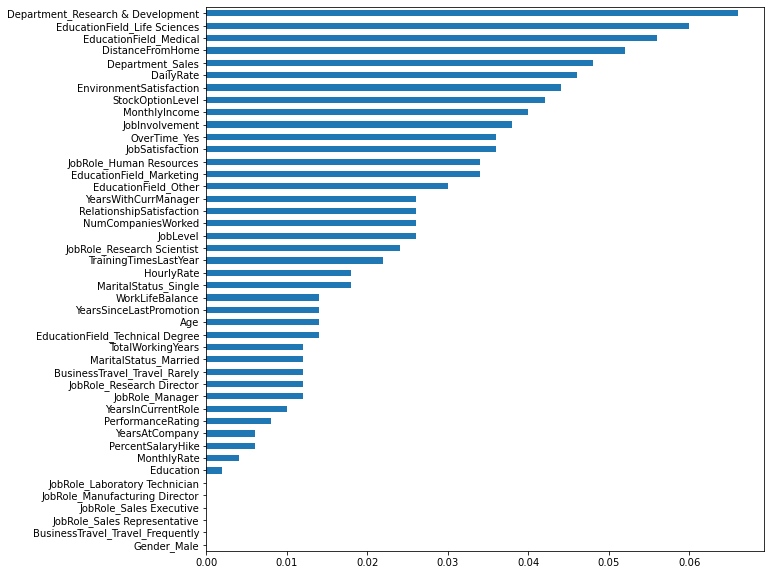

In [36]:
feature_importance = pd.Series(ab_feature_imp.feature_importances_, index=x_train.columns)
feature_importance = feature_importance.nsmallest(44)
feature_importance.plot(kind='barh', figsize=(10,10)) 